## Regresión Lineal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter   # pip install pillow

# ───────────────────────────────────────────────────────────────
# 1. Datos sintéticos: Temperatura 10–35 °C  →  Ventas de helados
#    (pendiente real ≈ 50 USD por °C, con poco ruido)
# ───────────────────────────────────────────────────────────────
np.random.seed(42)
n = 60
temperatura = np.random.uniform(10, 35, n)                # °C
ventas = 50 * temperatura + np.random.normal(0, 60, n)    # USD

# ───────────────────────────────────────────────────────────────
# 2. Gradiente descendente para la recta  y = b0 + b1 * x
# ───────────────────────────────────────────────────────────────
b0, b1 = 0.0, 0.0
lr = 1e-4           # learning-rate
iteraciones = 120   # cuadros del GIF

fig, ax = plt.subplots()
ax.scatter(temperatura, ventas, alpha=0.7)
linea, = ax.plot([], [], lw=2)
ax.set_title("Ajuste progresivo de la regresión lineal\nTemperatura vs Ventas de helados")
ax.set_xlabel("Temperatura (°C)")
ax.set_ylabel("Ventas de helados (USD)")

def actualizar(frame):
    global b0, b1
    y_pred = b0 + b1 * temperatura
    error = y_pred - ventas
    b0 -= lr * 2 * error.mean()
    b1 -= lr * 2 * (error * temperatura).mean()

    x_vals = np.array([temperatura.min(), temperatura.max()])
    linea.set_data(x_vals, b0 + b1 * x_vals)
    return linea,

anim = FuncAnimation(fig, actualizar, frames=iteraciones, blit=True)

# ───────────────────────────────────────────────────────────────
# 3. Guardar el GIF y mostrar coeficientes finales
# ───────────────────────────────────────────────────────────────
anim.save("regresion_helados.gif", writer=PillowWriter(fps=20))
plt.close(fig)

print("GIF guardado en regresion_helados.gif")
print(f"Coeficientes finales aproximados:\n  Intercepto (b0) = {b0:.2f}\n  Pendiente (b1)  = {b1:.2f}")


GIF guardado en regresion_helados.gif
Coeficientes finales aproximados:
  Intercepto (b0) = 2.07
  Pendiente (b1)  = 49.61


## Árboles de Decisión

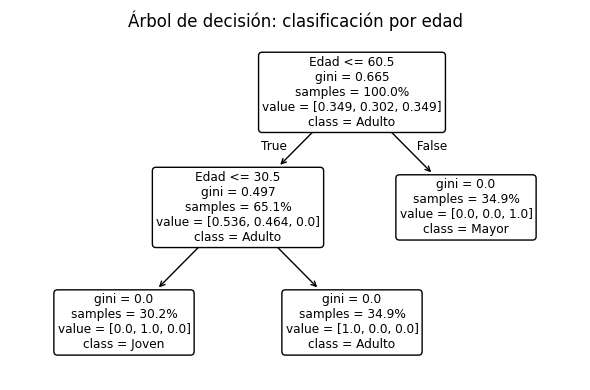

In [ ]:
# Árbol de decisión MUY intuitivo
# Clasifica a una persona en “Joven”, “Adulto” o “Mayor” usando SOLO la edad.
# Máx. 3 niveles → reglas fáciles de leer: “Edad ≤ 30.5”, “Edad ≤ 60.5”.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Datos artificiales súper simples ────────────────────────────────
edades = np.arange(5, 91)                         # 5, 6, … 90 años
etiquetas = np.where(
    edades <= 30,        'Joven',
    np.where(edades <= 60, 'Adulto', 'Mayor')
)

X = edades.reshape(-1, 1)      # Feature único: Edad

# 2. Entrenamos un árbol muy poco profundo (máx. 2 divisiones) ─────────
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X, etiquetas)

# 3. Dibujamos el árbol con reglas claras ─────────────────────────────
plt.figure(figsize=(6, 4))
plot_tree(
    clf,
    feature_names=['Edad'],
    class_names=clf.classes_,
    rounded=True,
    filled=False,
    proportion=True
)
plt.title("Árbol de decisión: clasificación por edad")
plt.tight_layout()
plt.show()


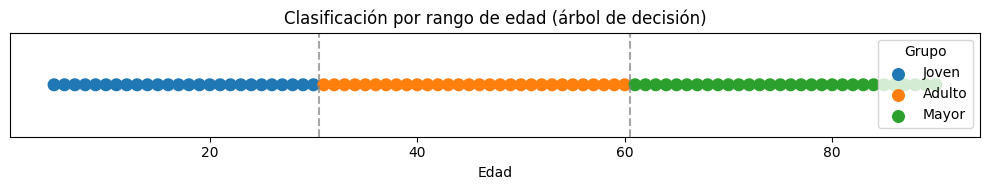

In [ ]:
# === Scatterplot coloreado por las clases que asigna el árbol de decisión ===
# (continúa justo después de entrenar el árbol `clf` en el ejemplo anterior)

import numpy as np
import matplotlib.pyplot as plt

# 1. Predicciones del árbol para cada edad
predicciones = clf.predict(X)     # X = edades.reshape(-1, 1)

# 2. Mapeamos cada clase a un color amigable
colores = {'Joven': 'tab:blue', 'Adulto': 'tab:orange', 'Mayor': 'tab:green'}
palette = [colores[c] for c in predicciones]

# 3. Creamos el scatterplot (edad en X, un eje Y “falso” en 0)
plt.figure(figsize=(10, 2))
plt.scatter(edades, np.zeros_like(edades), c=palette, s=70)

# Líneas verticales para los puntos de corte del árbol (opcionales pero ilustrativos)
plt.axvline(30.5, linestyle='--', color='gray', alpha=0.7)
plt.axvline(60.5, linestyle='--', color='gray', alpha=0.7)

# Ajustes de ejes y leyenda
plt.yticks([])                                # ocultamos eje Y
plt.xlabel("Edad")
plt.title("Clasificación por rango de edad (árbol de decisión)")

# Leyenda manual basada en el diccionario de colores
for clase, color in colores.items():
    plt.scatter([], [], c=color, s=70, label=clase)
plt.legend(title="Grupo")
plt.tight_layout()
plt.show()


## Limitaciones

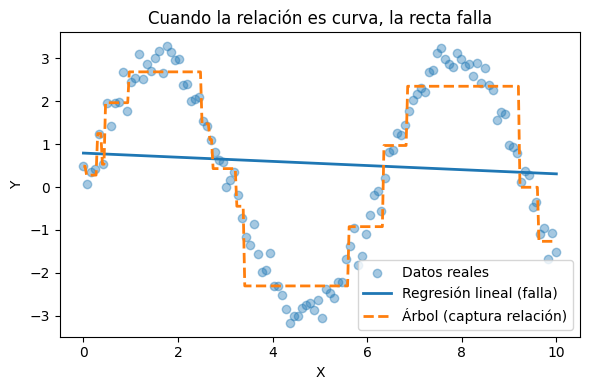

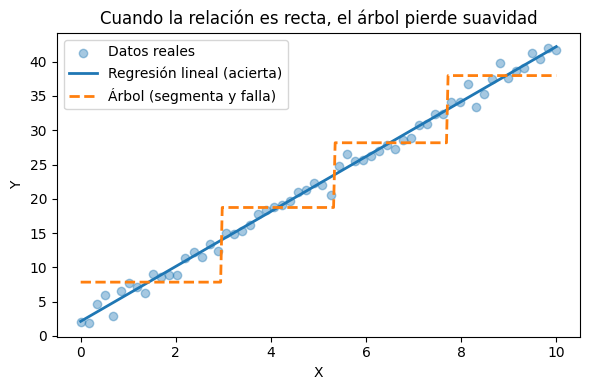

In [2]:
# Visualiza claramente cuándo falla cada método:
# ▸ Figura 1: relación no lineal (seno) → la Regresión Lineal se equivoca.
# ▸ Figura 2: relación lineal limpia → el Árbol de Decisión (poco profundo) se equivoca.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# ────────────────────────────────────────────────
# 1. Dataset no lineal  →  RL falla, Árbol acierta
# ────────────────────────────────────────────────
np.random.seed(1)
x_nonlin = np.linspace(0, 10, 120).reshape(-1, 1)
y_nonlin = 3 * np.sin(x_nonlin).ravel() + np.random.normal(0, 0.3, x_nonlin.shape[0])

rl_nonlin   = LinearRegression().fit(x_nonlin, y_nonlin)
tree_nonlin = DecisionTreeRegressor(max_depth=4, random_state=0).fit(x_nonlin, y_nonlin)

x_plot = np.linspace(0, 10, 300).reshape(-1, 1)
plt.figure(figsize=(6, 4))
plt.scatter(x_nonlin, y_nonlin, alpha=0.4, label="Datos reales")
plt.plot(x_plot, rl_nonlin.predict(x_plot), lw=2, label="Regresión lineal (falla)")
plt.plot(x_plot, tree_nonlin.predict(x_plot), lw=2, linestyle="--",
         label="Árbol (captura relación)")
plt.title("Cuando la relación es curva, la recta falla")
plt.xlabel("X"); plt.ylabel("Y"); plt.legend(); plt.tight_layout()
plt.show()

# ────────────────────────────────────────────────
# 2. Dataset lineal  →  Árbol falla, RL acierta
# ────────────────────────────────────────────────
x_lin = np.linspace(0, 10, 60).reshape(-1, 1)
y_lin = 4 * x_lin.ravel() + 2 + np.random.normal(0, 1, x_lin.shape[0])

rl_lin   = LinearRegression().fit(x_lin, y_lin)
tree_lin = DecisionTreeRegressor(max_depth=2, random_state=0).fit(x_lin, y_lin)

plt.figure(figsize=(6, 4))
plt.scatter(x_lin, y_lin, alpha=0.4, label="Datos reales")
plt.plot(x_plot, rl_lin.predict(x_plot), lw=2, label="Regresión lineal (acierta)")
plt.plot(x_plot, tree_lin.predict(x_plot), lw=2, linestyle="--",
         label="Árbol (segmenta y falla)")
plt.title("Cuando la relación es recta, el árbol pierde suavidad")
plt.xlabel("X"); plt.ylabel("Y"); plt.legend(); plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

# Datos reales simulados
np.random.seed(0)
temp = np.linspace(10, 35, 30)
ventas = 50 * temp + np.random.normal(0, 50, temp.shape[0])

# Modelo
modelo = LinearRegression().fit(temp.reshape(-1, 1), ventas)

# Widget interactivo
@widgets.interact(temp_usuario=widgets.FloatSlider(min=10, max=35, step=0.5, value=22, description="°C:"))
def predecir_ventas(temp_usuario):
    pred = modelo.predict([[temp_usuario]])[0]

    plt.figure(figsize=(6, 4))
    plt.scatter(temp, ventas, label="Datos reales", alpha=0.6)
    plt.plot(temp, modelo.predict(temp.reshape(-1, 1)), label="Línea de regresión")
    plt.axvline(temp_usuario, color="red", linestyle="--", label=f"Tú: {temp_usuario} °C")
    plt.axhline(pred, color="gray", linestyle=":")
    plt.scatter(temp_usuario, pred, color="red", s=100)
    plt.title(f"Predicción: ventas ≈ ${pred:.2f}")
    plt.xlabel("Temperatura (°C)")
    plt.ylabel("Ventas de helado (USD)")
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=22.0, description='°C:', max=35.0, min=10.0, step=0.5), Output()), _do…

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Dataset simple
edades = np.arange(5, 91)
etiquetas = np.where(edades <= 30, 'Joven',
                     np.where(edades <= 60, 'Adulto', 'Mayor'))
X = edades.reshape(-1, 1)

# Modelo
arbol = DecisionTreeClassifier(max_depth=2).fit(X, etiquetas)

# Widget interactivo
@widgets.interact(edad_usuario=widgets.IntSlider(min=5, max=90, step=1, value=25, description="Edad:"))
def clasificar_edad(edad_usuario):
    pred = arbol.predict([[edad_usuario]])[0]
    print(f"📌 Clasificación del árbol: {pred}")


interactive(children=(IntSlider(value=25, description='Edad:', max=90, min=5), Output()), _dom_classes=('widge…